In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Checking Null values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing null values with mean

In [7]:
df = df.fillna(df.mean())

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_9012\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

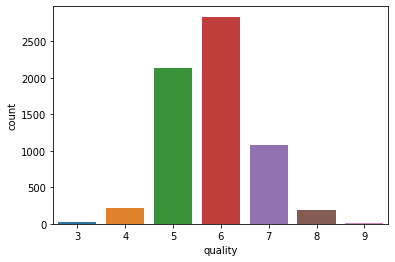

In [9]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='quality', data=df)

## Checking duplicated values

In [10]:
df.duplicated().sum()

1168

### Dropping the duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5329, 13)

<AxesSubplot:>

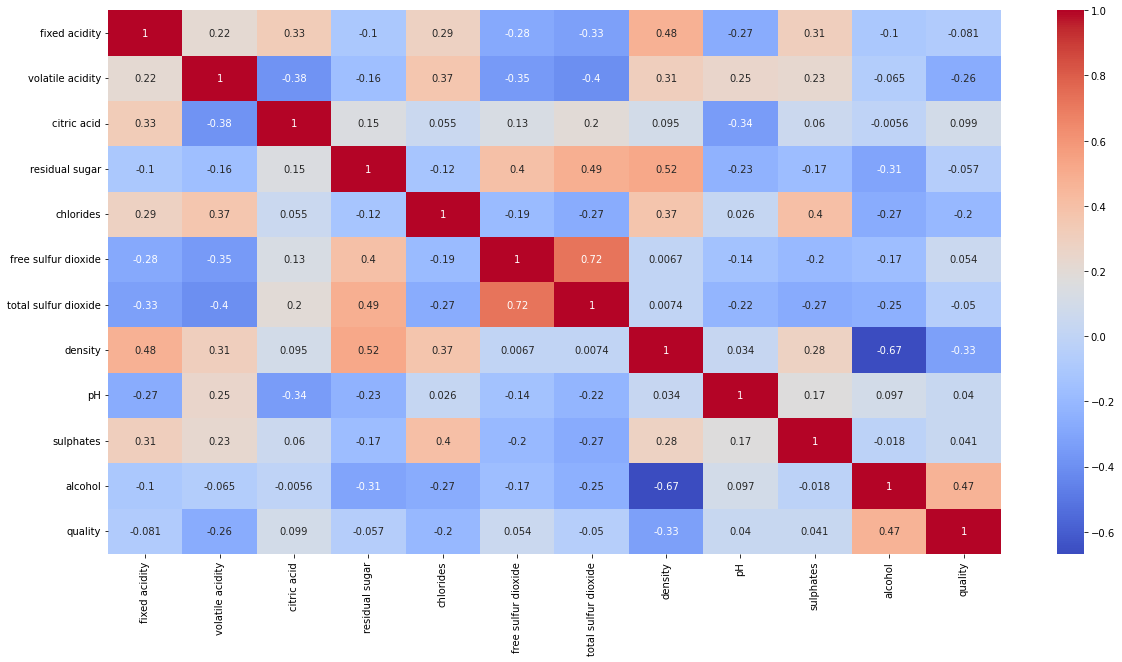

In [13]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [14]:
df.duplicated().sum()

0

## Checking Outliers

In [15]:
# import warnings

# # outlier check
# plt.figure(figsize=(15, 20))

# for i, c in enumerate(df.drop('quality', axis=1).select_dtypes(include='number').columns):
#     plt.subplot(10,2,i*2+1)
#     sns.boxplot(df[c], color='blue')
#     plt.title('Distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
#     plt.subplot(10,2,i*2+2)
#     sns.boxplot(df[c].apply('log1p'), color='red')
#     plt.title('Log1p distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## Treating cat variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.type.head()

0    1
1    1
2    1
3    1
6    1
Name: type, dtype: int32

In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


## Data splitting

In [20]:
target = 'quality'
y = df[target]
X = df.drop(target,axis=1)

In [21]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


## Data Balancing using SMOTE

In [22]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X,y)

In [24]:
X_resampled.shape

(16289, 12)

In [25]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [26]:
y_resampled.value_counts()

6    2327
5    2327
7    2327
8    2327
4    2327
3    2327
9    2327
Name: quality, dtype: int64

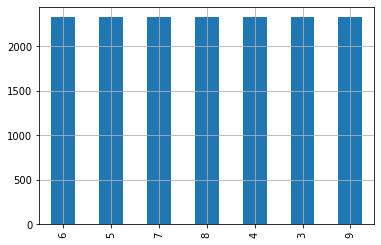

In [27]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


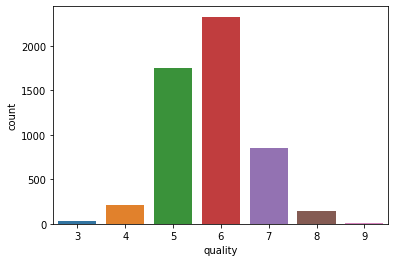

In [28]:
sns.countplot(df['quality'])
plt.show()

## Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2,random_state=10)

# feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4944,0,7.000000,0.220000,0.300000,1.800000,0.065000,16.000000,20.000000,0.996720,3.610000,0.820000,10.000000
11591,1,5.820474,0.232221,0.271462,2.166087,0.032146,18.000000,89.000000,0.990895,3.453391,0.565265,11.985376
14517,1,6.646779,0.352983,0.294093,1.623389,0.021585,24.175420,88.157555,0.989703,3.402398,0.602398,12.405847
12601,1,5.596917,0.282795,0.281180,4.951542,0.032795,60.471849,138.882038,0.989906,3.176769,0.375282,12.444102
873,1,8.000000,0.550000,0.170000,8.200000,0.040000,13.000000,60.000000,0.995600,3.090000,0.300000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
11633,1,6.360071,0.397446,0.295719,1.837052,0.031198,20.543161,120.514387,0.989201,3.232554,0.471726,12.700000
1344,1,6.400000,0.250000,0.740000,7.800000,0.045000,52.000000,209.000000,0.995600,3.210000,0.420000,9.200000
12815,1,5.418094,0.411776,0.070790,2.221059,0.037796,43.000000,118.615129,0.989895,3.342039,0.364638,12.023026
7293,0,7.269399,1.050046,0.021767,4.881237,0.090470,4.129328,14.000000,0.997244,3.529873,0.531293,10.482332


## Model Building

# Extra Tree

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [33]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [34]:
y_train_ = etc.predict(X_train)
y_test_  = etc.predict(X_test)

In [36]:
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_,digits=4))


Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     1.0000    1.0000    1.0000      1851
           4     1.0000    1.0000    1.0000      1860
           5     1.0000    1.0000    1.0000      1868
           6     1.0000    1.0000    1.0000      1854
           7     1.0000    1.0000    1.0000      1856
           8     1.0000    1.0000    1.0000      1905
           9     1.0000    1.0000    1.0000      1837

    accuracy                         1.0000     13031
   macro avg     1.0000    1.0000    1.0000     13031
weighted avg     1.0000    1.0000    1.0000     13031



In [35]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9958    0.9979    0.9969       476
           4     0.9018    0.9636    0.9317       467
           5     0.7087    0.6732    0.6905       459
           6     0.6091    0.5074    0.5536       473
           7     0.7760    0.8386    0.8061       471
           8     0.9159    0.9810    0.9474       422
           9     0.9980    1.0000    0.9990       490

    accuracy                         0.8511      3258
   macro avg     0.8436    0.8517    0.8464      3258
weighted avg     0.8440    0.8511    0.8463      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

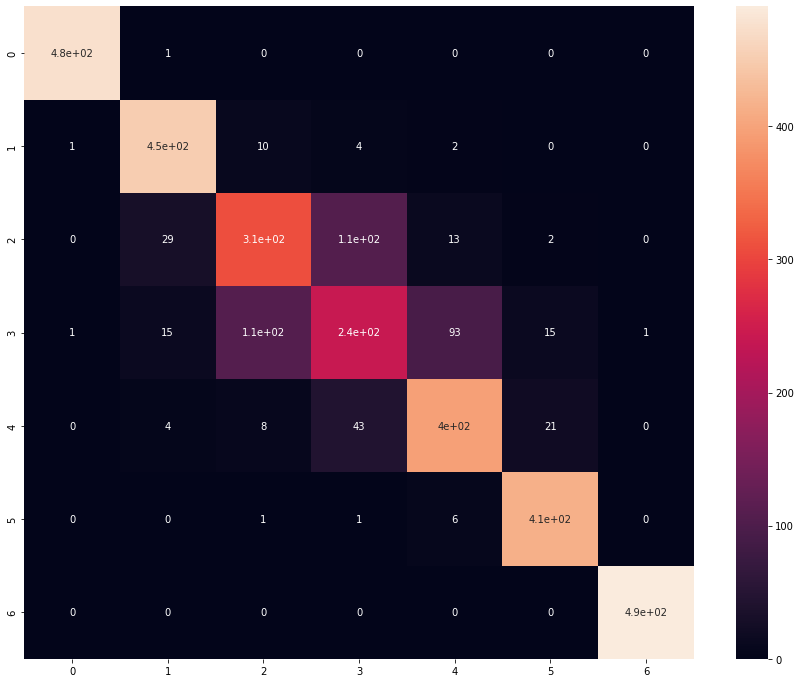

In [37]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_)
sns.heatmap(cr,annot=True)


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
DT_train = DTR.predict(X_train)
DT_test = DTR.predict(X_test)

In [40]:
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, DT_train,digits=4))


Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     1.0000    1.0000    1.0000      1851
           4     1.0000    1.0000    1.0000      1860
           5     1.0000    1.0000    1.0000      1868
           6     1.0000    1.0000    1.0000      1854
           7     1.0000    1.0000    1.0000      1856
           8     1.0000    1.0000    1.0000      1905
           9     1.0000    1.0000    1.0000      1837

    accuracy                         1.0000     13031
   macro avg     1.0000    1.0000    1.0000     13031
weighted avg     1.0000    1.0000    1.0000     13031



In [41]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT_test,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9390    0.9706    0.9545       476
           4     0.7714    0.8308    0.8000       467
           5     0.5779    0.5251    0.5502       459
           6     0.4050    0.3784    0.3913       473
           7     0.6250    0.6157    0.6203       471
           8     0.8035    0.8626    0.8320       422
           9     0.9979    0.9918    0.9949       490

    accuracy                         0.7397      3258
   macro avg     0.7314    0.7393    0.7347      3258
weighted avg     0.7325    0.7397    0.7355      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

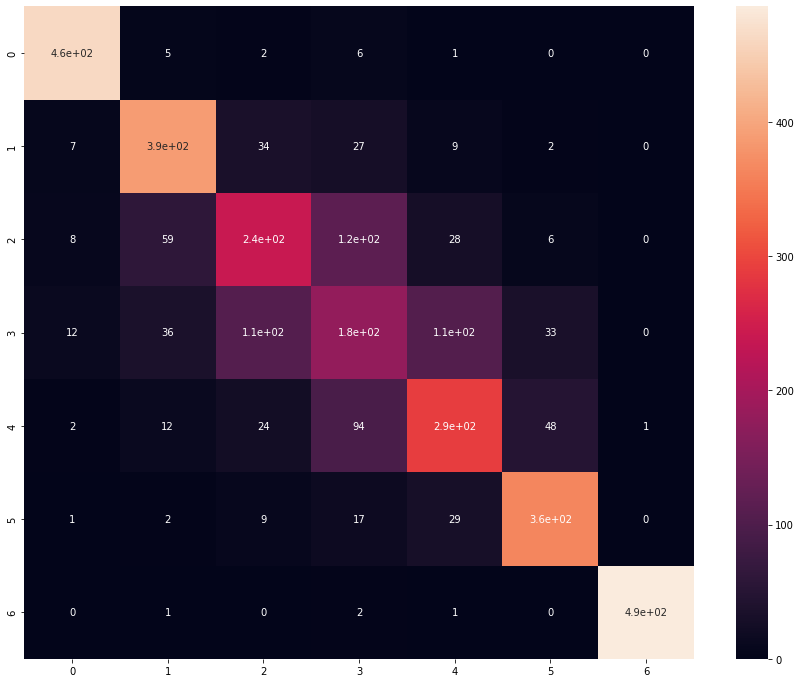

In [42]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT_test)
sns.heatmap(cr,annot=True)

# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

In [42]:
GB_train = GB.predict(X_train)
GB_test = GB.predict(X_test)

In [43]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9080    0.9328    0.9202       476
           4     0.7616    0.8073    0.7838       467
           5     0.5568    0.5556    0.5562       459
           6     0.5037    0.4355    0.4671       473
           7     0.6206    0.5626    0.5902       471
           8     0.7146    0.8246    0.7657       422
           9     0.9899    0.9959    0.9929       490

    accuracy                         0.7314      3258
   macro avg     0.7222    0.7306    0.7251      3258
weighted avg     0.7245    0.7314    0.7268      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

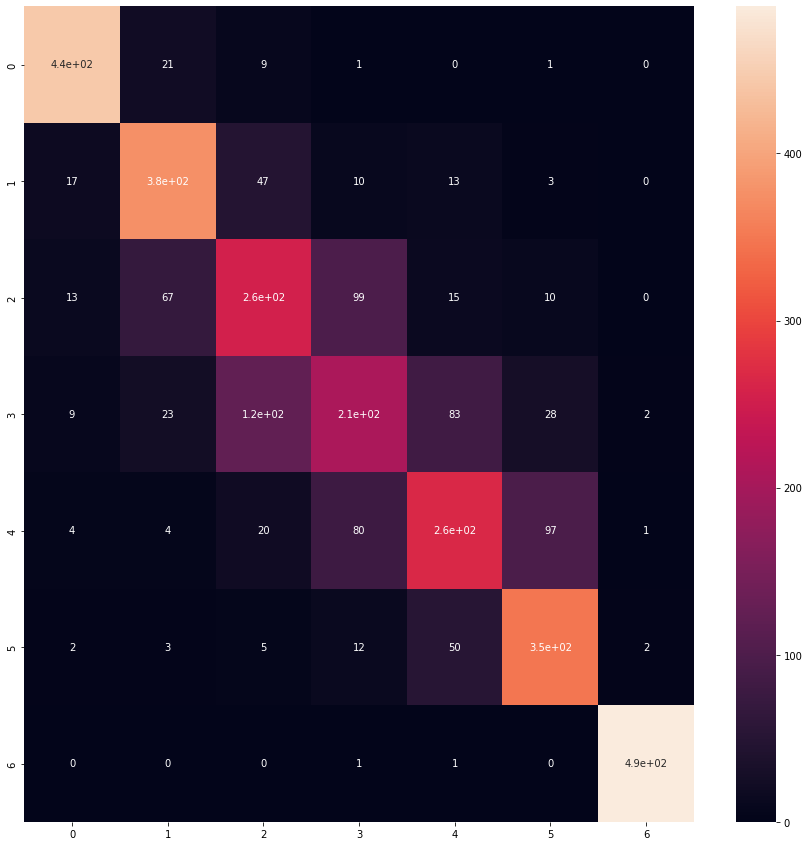

In [44]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test)
sns.heatmap(cr,annot=True)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logre = LogisticRegression()
logre.fit(X_train, y_train)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
LR_train = logre.predict(X_train)
LR_test  = logre.predict(X_test)


In [45]:
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, LR_train,digits=4))


Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.3131    0.3679    0.3383      1851
           4     0.3364    0.5048    0.4038      1860
           5     0.2785    0.1633    0.2059      1868
           6     0.2035    0.0998    0.1339      1854
           7     0.2160    0.0668    0.1021      1856
           8     0.3956    0.5213    0.4498      1905
           9     0.3766    0.6102    0.4657      1837

    accuracy                         0.3337     13031
   macro avg     0.3028    0.3334    0.2999     13031
weighted avg     0.3031    0.3337    0.3002     13031



In [47]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, LR_test,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.3003    0.3887    0.3388       476
           4     0.3951    0.5203    0.4492       467
           5     0.2679    0.1547    0.1961       459
           6     0.2020    0.1290    0.1574       473
           7     0.2416    0.0764    0.1161       471
           8     0.3371    0.4953    0.4012       422
           9     0.3357    0.4735    0.3929       490

    accuracy                         0.3183      3258
   macro avg     0.2971    0.3197    0.2931      3258
weighted avg     0.2967    0.3183    0.2922      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

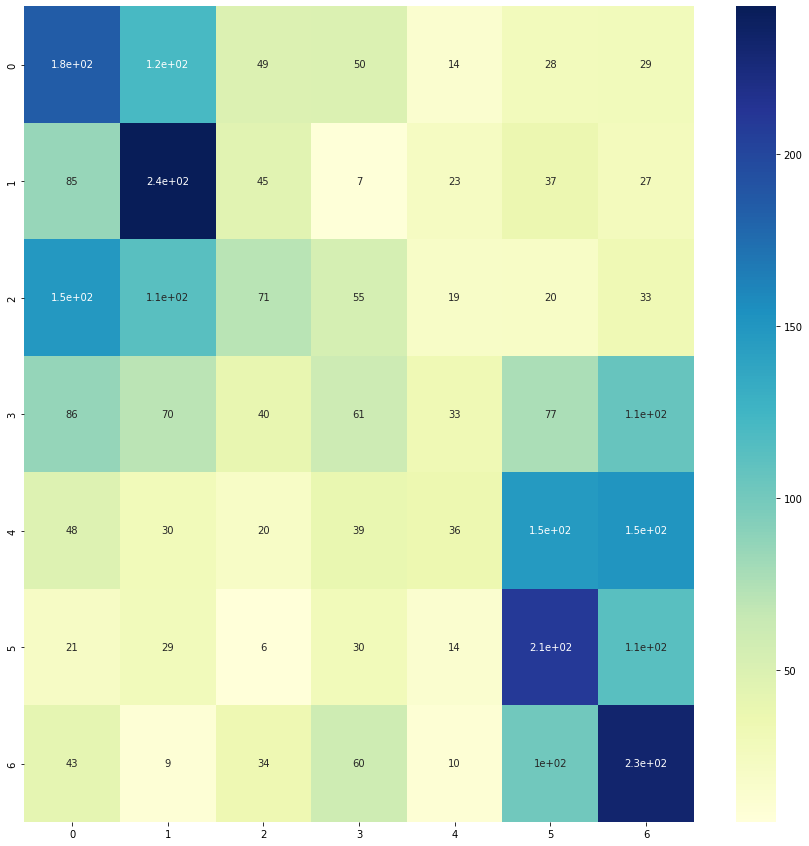

In [48]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test)
sns.heatmap(cr,annot=True,cmap='YlGnBu')

# SVC

In [46]:
from sklearn.svm import SVC
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [47]:
SVC_train = svm.predict(X_train)
SVC_test  = svm.predict(X_test)

In [48]:
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, SVC_train,digits=4))


Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4073    0.4543    0.4295      1851
           4     0.3646    0.4763    0.4131      1860
           5     0.2961    0.3196    0.3074      1868
           6     0.2121    0.0512    0.0825      1854
           7     0.2609    0.0097    0.0187      1856
           8     0.3280    0.2278    0.2689      1905
           9     0.3626    0.9238    0.5208      1837

    accuracy                         0.3505     13031
   macro avg     0.3188    0.3518    0.2916     13031
weighted avg     0.3187    0.3505    0.2912     13031



In [51]:
print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_test, SVC_test,digits=4))

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4144    0.4223    0.4183       476
           4     0.4032    0.5439    0.4631       467
           5     0.2746    0.3224    0.2966       459
           6     0.1803    0.0233    0.0412       473
           7     0.3214    0.0573    0.0973       471
           8     0.2808    0.2109    0.2409       422
           9     0.3949    0.9204    0.5527       490

    accuracy                         0.3625      3258
   macro avg     0.3242    0.3572    0.3014      3258
weighted avg     0.3254    0.3625    0.3037      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

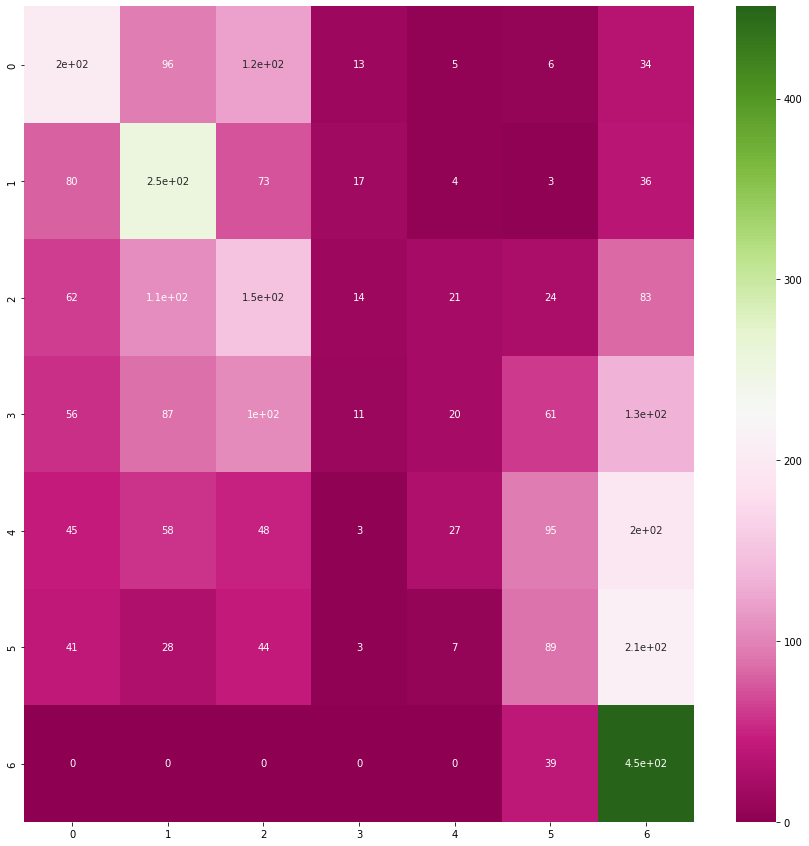

In [52]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, SVC_test)
sns.heatmap(cr,annot=True,cmap = "PiYG")

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=123)

In [50]:
RFC_train = rfc.predict(X_train)
RFC_test = rfc.predict(X_test)

In [51]:
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, RFC_train,digits=4))


Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     1.0000    1.0000    1.0000      1851
           4     1.0000    1.0000    1.0000      1860
           5     1.0000    1.0000    1.0000      1868
           6     1.0000    1.0000    1.0000      1854
           7     1.0000    1.0000    1.0000      1856
           8     1.0000    1.0000    1.0000      1905
           9     1.0000    1.0000    1.0000      1837

    accuracy                         1.0000     13031
   macro avg     1.0000    1.0000    1.0000     13031
weighted avg     1.0000    1.0000    1.0000     13031



In [55]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9896    1.0000    0.9948       476
           4     0.8704    0.9636    0.9146       467
           5     0.6881    0.6536    0.6704       459
           6     0.6105    0.4905    0.5440       473
           7     0.7782    0.8195    0.7983       471
           8     0.8978    0.9787    0.9365       422
           9     1.0000    0.9959    0.9980       490

    accuracy                         0.8425      3258
   macro avg     0.8335    0.8431    0.8367      3258
weighted avg     0.8341    0.8425    0.8367      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

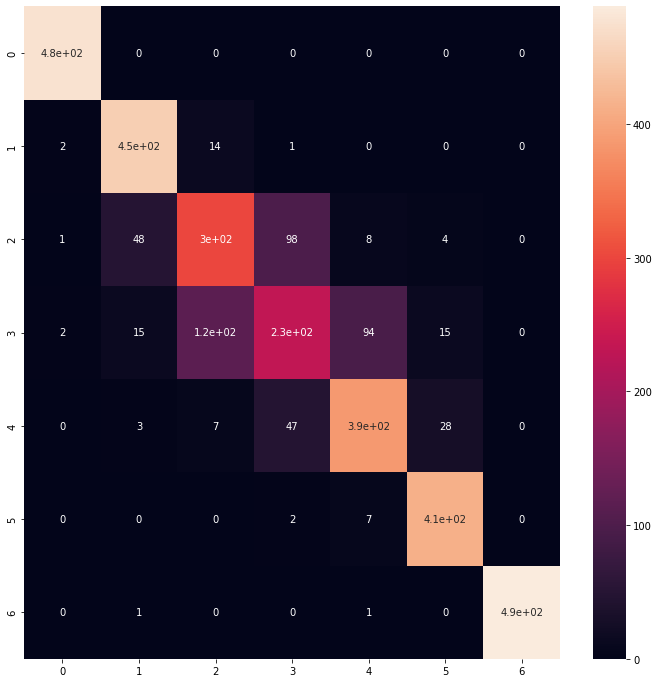

In [56]:
plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_test)
sns.heatmap(cr,annot=True)

# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [58]:
NB_test = NB.predict(X_test)

In [59]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, NB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.6832    0.3761    0.4851       476
           4     0.4229    0.4347    0.4287       467
           5     0.3700    0.4031    0.3858       459
           6     0.2519    0.1416    0.1813       473
           7     0.2889    0.1656    0.2105       471
           8     0.3437    0.4194    0.3778       422
           9     0.5078    1.0000    0.6735       490

    accuracy                         0.4233      3258
   macro avg     0.4098    0.4201    0.3918      3258
weighted avg     0.4118    0.4233    0.3937      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

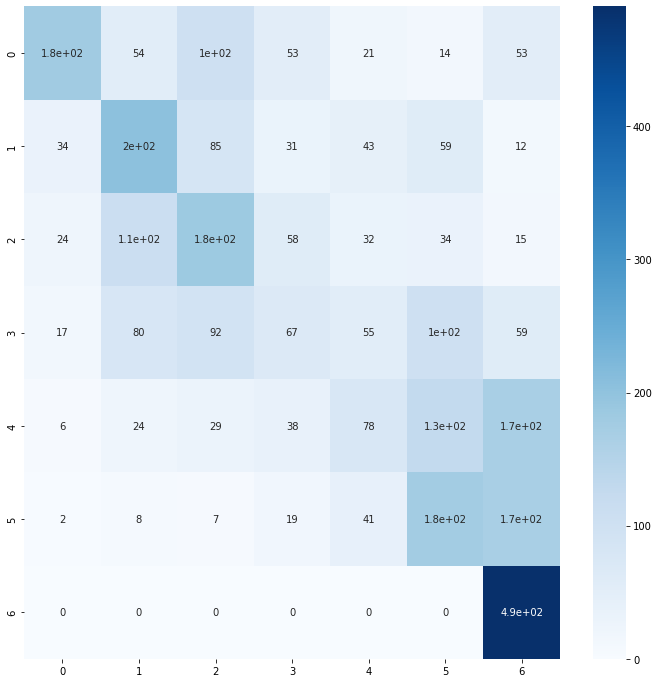

In [60]:
plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, NB_test)
sns.heatmap(cr,annot=True,cmap='Blues')

In [66]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[100,150,180],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    },
    
    'Extra Tree' : {
        'model' : ExtraTreesClassifier(random_state=123,max_features='log2'),
        'params': {
            'n_estimators':[100,150,180],
            "max_depth":[5,8,9],
            'criterion':["entropy","gini"]
            
        }
    }
    
}

In [67]:
from sklearn.model_selection import GridSearchCV
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(X,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packa

In [68]:
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [69]:
df5

,Model,Best_Score,Best_Params
0,svm,0.445492,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.521115,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.545135,"{'max_depth': 9, 'n_estimators': 100}"
3,naive_bayes,0.374727,{}
4,logistic_regression,0.531442,{'C': 10}
5,Extra Tree,0.531059,"{'criterion': 'gini', 'max_depth': 9, 'n_estim..."


# Stacking

In [65]:
estimators = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
#     ('DTC',DecisionTreeClassifier()),
    ('GB',GradientBoostingClassifier(n_estimators=120,random_state=123))
]

In [66]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

In [67]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=120,
                                                           random_state=123))],
                   final_estimator=GradientBoostingClassifier())

In [68]:
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8692449355432781

In [70]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           3     0.9896    0.9958    0.9927       476
           4     0.9677    0.9636    0.9657       467
           5     0.7242    0.7037    0.7138       459
           6     0.6027    0.6512    0.6260       473
           7     0.8559    0.8068    0.8306       471
           8     0.9622    0.9645    0.9633       422
           9     1.0000    1.0000    1.0000       490

    accuracy                         0.8692      3258
   macro avg     0.8718    0.8694    0.8703      3258
weighted avg     0.8716    0.8692    0.8702      3258



In [71]:
from sklearn.ensemble import StackingClassifier

clf1 = StackingClassifier(
    estimators=estimators, 
    final_estimator=ExtraTreesClassifier(n_estimators=150,random_state=123),
    cv=10
)

In [72]:
clf1.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=120,
                                                           random_state=123))],
                   final_estimator=ExtraTreesClassifier(n_estimators=150,
                                                        random_state=123))

In [73]:
y_pred1 = clf1.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8624923265807244

In [75]:
print(classification_report(y_test,y_pred1,digits=4))

              precision    recall  f1-score   support

           3     1.0000    0.9979    0.9989       476
           4     0.9594    0.9615    0.9604       467
           5     0.7329    0.6993    0.7157       459
           6     0.5822    0.6216    0.6012       473
           7     0.8217    0.8025    0.8120       471
           8     0.9550    0.9550    0.9550       422
           9     1.0000    1.0000    1.0000       490

    accuracy                         0.8625      3258
   macro avg     0.8645    0.8625    0.8633      3258
weighted avg     0.8643    0.8625    0.8632      3258



In [76]:
from sklearn.ensemble import StackingClassifier

clf2 = StackingClassifier(
    estimators=estimators, 
    final_estimator=ExtraTreesClassifier(n_estimators=150,random_state=123),
    cv=10
)

In [77]:
clf2.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=120,
                                                           random_state=123))],
                   final_estimator=ExtraTreesClassifier(n_estimators=150,
                                                        random_state=123))

In [78]:
y_pred2 = clf2.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8606507059545734

In [80]:
print(classification_report(y_test,y_pred2,digits=4))

              precision    recall  f1-score   support

           3     1.0000    0.9958    0.9979       476
           4     0.9551    0.9572    0.9561       467
           5     0.7149    0.7102    0.7126       459
           6     0.5824    0.6279    0.6043       473
           7     0.8425    0.7834    0.8119       471
           8     0.9502    0.9502    0.9502       422
           9     1.0000    1.0000    1.0000       490

    accuracy                         0.8607      3258
   macro avg     0.8636    0.8607    0.8619      3258
weighted avg     0.8635    0.8607    0.8618      3258



# Voting

In [1]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=42)
model2 = ExtraTreesClassifier()
model3 = DecisionTreeClassifier(random_state=42)
model4 = RandomForestClassifier(random_state=42)
# define the voting ensemble model
ensemble = VotingClassifier(estimators=[('RFC', clf), ('ETC', clf1), ('Stacking', clf2)], voting='hard')

# fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble.predict(X_test)

# evaluate the ensemble model
accuracy = ensemble.score(X_test, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))


NameError: name 'LogisticRegression' is not defined

# Accuracy of the voting ensemble model: 86.68% with stacking on 80 - 20